<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_6_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,206.205938,334.148479,41.892392,292.256087
1,0.0,1.0,47.067808,95.047509,91.779690,-1980.312837,-1736.417830,728.387628,-2464.805458
2,0.0,2.0,99.291665,61.179446,95.992578,-37.328766,229.134924,791.324114,-562.189190
3,0.0,3.0,36.059748,81.961304,62.806562,364.010713,554.838327,426.084599,128.753728
4,0.0,4.0,22.561835,57.403703,99.891733,-539.473937,-349.616666,451.248941,-800.865607
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,190.386128,310.438415,104.589665,205.848750
29996,999.0,26.0,93.324773,99.972234,27.596461,-128.949055,101.944413,505.224413,-403.279999
29997,999.0,27.0,28.102838,93.083445,72.411123,-505.528352,-301.930946,-126.853947,-175.076999
29998,999.0,28.0,30.257867,20.848863,55.174370,-28.207788,88.073311,194.792642,-106.719331


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,206.205938,334.148479,41.892392,292.256087
1,0.0,1.0,47.067808,95.047509,91.779690,-1980.312837,-1736.417830,728.387628,-2464.805458
2,0.0,2.0,99.291665,61.179446,95.992578,-37.328766,229.134924,791.324114,-562.189190
3,0.0,3.0,36.059748,81.961304,62.806562,364.010713,554.838327,426.084599,128.753728
4,0.0,4.0,22.561835,57.403703,99.891733,-539.473937,-349.616666,451.248941,-800.865607
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,190.386128,310.438415,104.589665,205.848750
29996,999.0,26.0,93.324773,99.972234,27.596461,-128.949055,101.944413,505.224413,-403.279999
29997,999.0,27.0,28.102838,93.083445,72.411123,-505.528352,-301.930946,-126.853947,-175.076999
29998,999.0,28.0,30.257867,20.848863,55.174370,-28.207788,88.073311,194.792642,-106.719331


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    44.623839  37.451801  ...   41.892392   292.256087
      1.0    47.067808  95.047509  ...  728.387628 -2464.805458
      2.0    99.291665  61.179446  ...  791.324114  -562.189190
      3.0    36.059748  81.961304  ...  426.084599   128.753728
      4.0    22.561835  57.403703  ...  451.248941  -800.865607
...                ...        ...  ...         ...          ...
999.0 25.0   22.165046  31.666469  ...  104.589665   205.848750
      26.0   93.324773  99.972234  ...  505.224413  -403.279999
      27.0   28.102838  93.083445  ... -126.853947  -175.076999
      28.0   30.257867  20.848863  ...  194.792642  -106.719331
      29.0   90.716789  93.036058  ...  282.418146  1543.249369

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    44.623839  37.451801  ...   41.892392   292.256087
      1.0    47.067808  95.047509  ...  728.387628 -2464.805458
      2.0    99.291665  61.179446  ...  791.324114  -562.189190
      3.0    36.059748  81.961304  ...  426.084599   128.753728
      4.0    22.561835  57.403703  ...  451.248941  -800.865607
...                ...        ...  ...         ...          ...
999.0 25.0   22.165046  31.666469  ...  104.589665   205.848750
      26.0   93.324773  99.972234  ...  505.224413  -403.279999
      27.0   28.102838  93.083445  ... -126.853947  -175.076999
      28.0   30.257867  20.848863  ...  194.792642  -106.719331
      29.0   90.716789  93.036058  ...  282.418146  1543.249369

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,206.205938,334.148479,41.892392,292.256087
1,0.0,1.0,47.067808,95.047509,91.779690,-1980.312837,-1736.417830,728.387628,-2464.805458
2,0.0,2.0,99.291665,61.179446,95.992578,-37.328766,229.134924,791.324114,-562.189190
3,0.0,3.0,36.059748,81.961304,62.806562,364.010713,554.838327,426.084599,128.753728
4,0.0,4.0,22.561835,57.403703,99.891733,-539.473937,-349.616666,451.248941,-800.865607
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,190.386128,310.438415,104.589665,205.848750
29996,999.0,26.0,93.324773,99.972234,27.596461,-128.949055,101.944413,505.224413,-403.279999
29997,999.0,27.0,28.102838,93.083445,72.411123,-505.528352,-301.930946,-126.853947,-175.076999
29998,999.0,28.0,30.257867,20.848863,55.174370,-28.207788,88.073311,194.792642,-106.719331


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    44.623839  37.451801  ...   41.892392   292.256087
      1.0    47.067808  95.047509  ...  728.387628 -2464.805458
      2.0    99.291665  61.179446  ...  791.324114  -562.189190
      3.0    36.059748  81.961304  ...  426.084599   128.753728
      4.0    22.561835  57.403703  ...  451.248941  -800.865607
...                ...        ...  ...         ...          ...
999.0 25.0   22.165046  31.666469  ...  104.589665   205.848750
      26.0   93.324773  99.972234  ...  505.224413  -403.279999
      27.0   28.102838  93.083445  ... -126.853947  -175.076999
      28.0   30.257867  20.848863  ...  194.792642  -106.719331
      29.0   90.716789  93.036058  ...  282.418146  1543.249369

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

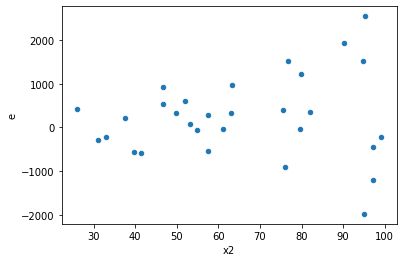

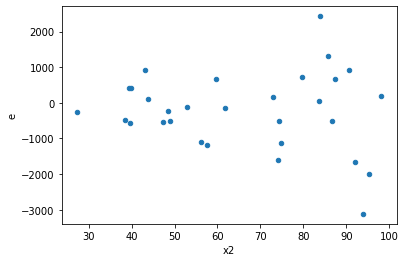

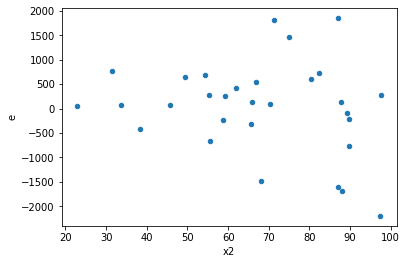

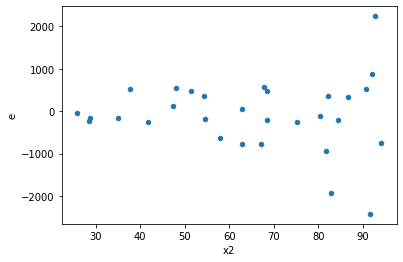

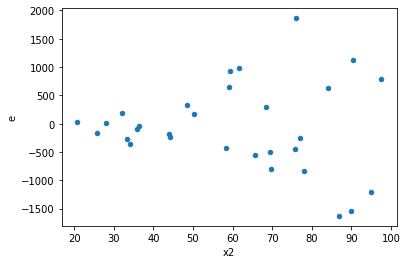

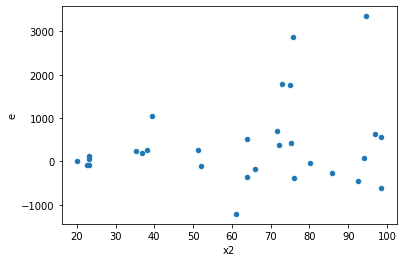

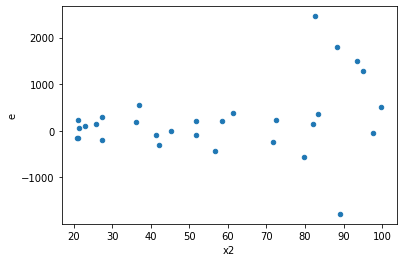

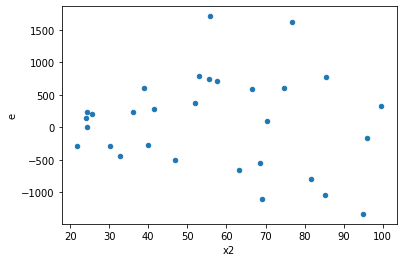

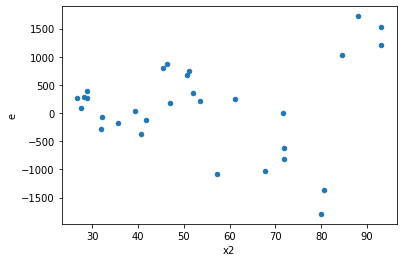

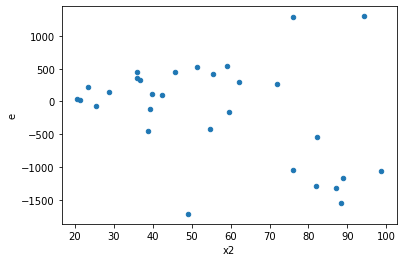

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,19131476.067053948,1685283.7193532258,2391434.5083817434,210660.46491915322,11.352080274291252,0.001274601013354193,0.9993626994933229,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,16505273.83990228,1869814.86034685,2063159.229987785,233726.85754335625,8.82722358770887,0.0033459421004284895,0.9983270289497858,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,9413618.119984165,2112517.9716217313,1176702.2649980206,264064.7464527164,4.456112679958669,0.03640591990392705,0.9817970400480365,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,14247133.951070681,876838.5737266132,1780891.7438838352,109604.82171582665,16.248297438055857,0.00030407708714719206,0.9998479614564264,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,13232083.77961325,428559.18930924626,1654010.4724516564,53569.89866365578,30.875743910522107,2.0749031876210466e-05,0.9999896254840619,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,18292432.43691378,1524137.630627553,2286554.0546142226,190517.20382844412,12.001824552669827,0.0010245426135078173,0.9994877286932461,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,9555932.920742193,648455.4450554384,1194491.6150927742,81056.9306319298,14.736452586846932,0.00045186214378234446,0.9997740689281088,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,5921761.213055565,1259517.502279109,740220.1516319456,157439.68778488864,4.701610896506068,0.03065191183795979,0.9846740440810201,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,6989133.356160183,1144347.3484557457,873641.6695200229,143043.41855696822,6.107527898405812,0.012721344796661427,0.9936393276016693,Reject005=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,19131476.067053948,1685283.7193532258,2391434.5083817434,210660.46491915322,11.352080274291252,0.001274601013354193,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,16505273.83990228,1869814.86034685,2063159.229987785,233726.85754335625,8.82722358770887,0.0033459421004284895,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,9413618.119984165,2112517.9716217313,1176702.2649980206,264064.7464527164,4.456112679958669,0.03640591990392705,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,14247133.951070681,876838.5737266132,1780891.7438838352,109604.82171582665,16.248297438055857,0.00030407708714719206,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,13232083.77961325,428559.18930924626,1654010.4724516564,53569.89866365578,30.875743910522107,2.0749031876210466e-05,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,18292432.43691378,1524137.630627553,2286554.0546142226,190517.20382844412,12.001824552669827,0.0010245426135078173,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,9555932.920742193,648455.4450554384,1194491.6150927742,81056.9306319298,14.736452586846932,0.00045186214378234446,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,5921761.213055565,1259517.502279109,740220.1516319456,157439.68778488864,4.701610896506068,0.03065191183795979,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,6989133.356160183,1144347.3484557457,873641.6695200229,143043.41855696822,6.107527898405812,0.012721344796661427,Reject005=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    901
Reject005=1 : Homoscedasticity       99
Name: Result_test, dtype: int64